In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import File

In [2]:
df = pd.read_csv('bank.csv')
df.head()
# Import File csv
# Mengecheck Dataframe dari bank.csv

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Problems
- Cara Mempertahankan Customer agar tidak pindah Bank

# Goals
- Menjelaskan Apa itu Credit Score
- Apa hubungannya antara durasi Tenor dan Nominal Uang yang di pinjam terhadap Gaji dan Umur
- Jumlah Customer yang melakukan perpiandahan Bank
- Dari Gender/Negara mana yang paling melakukan peminjaman di bank
- Menemukan Kenapa customer Melakukan Pindah Bank
- Menemukan kegunaan mempunyai banyak produk
- Menemukan kelebihan dari Kartu Kredit bagi pihak Bank
- Menemukan nilai apakah Member yang active lebih banyak meminjam dari pada member yang tidak aktif

# Pengecheckan Dataframe

In [3]:
df.info()
# Pengecheckan data, type data berupa object, int, atau float
# sekaligus mengecheck missing values dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

# Rata2 umur customer adalah = 38.9 / 39 tahun
# Nilai maximum tenure adalah 10, kalau di dalam bank tenure berupa tahunan
# HasCrCard = yang mempunyai creditcard, 0 = tidak punya, 1 = punya artinya, nilai rata2nya adalah 0.705 bisa di artikan bahwa 70% dari customer mempunyai credit card
# Rata2 gaji customer adalah 100.000


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Pengecheckan Missing Value

In [5]:
df.isna().sum()
## Jumlah Missing Value = tidak ada,
## digunakan untuk pengecheckan missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Pengecheckan Outliers

In [7]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers
# pengecheckan outliers

In [8]:
df_row_outliers = df['RowNumber']
outliers = []
cek_outlier(df_row_outliers)
## utliers rownumber

[]

In [9]:
df_custID_outliers = df['CustomerId']
outliers = []
cek_outlier(df_custID_outliers)
## Outliers CustomerID

[]

outliers = []
cek_outlier(df['Surname'])
Object, tidak ada outliers

In [25]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [10]:
df_CS_outliers = df['CreditScore']
outliers = []
cek_outlier(df_CS_outliers)
## Outliers CreditScore

[376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]

outliers = []
cek_outlier(df['Geography'])
Geography, tidak ada outliers

In [26]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

outliers = []
cek_outlier(df['Gender'])
Gender, tidak ada outliers, karena object tidak bisa di gunakan outliers

In [27]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df_age_outliers = df['Age']
outliers = []
cek_outlier(df_age_outliers)

## Outliers Age

[66,
 75,
 65,
 73,
 65,
 72,
 67,
 67,
 79,
 80,
 68,
 75,
 66,
 66,
 70,
 63,
 72,
 64,
 64,
 70,
 67,
 82,
 63,
 69,
 65,
 69,
 64,
 65,
 74,
 67,
 66,
 67,
 63,
 70,
 71,
 72,
 67,
 74,
 76,
 66,
 63,
 66,
 68,
 67,
 63,
 71,
 66,
 69,
 73,
 65,
 66,
 64,
 69,
 64,
 77,
 74,
 65,
 70,
 67,
 69,
 67,
 74,
 69,
 74,
 74,
 64,
 63,
 63,
 70,
 74,
 65,
 72,
 77,
 66,
 65,
 74,
 88,
 63,
 71,
 63,
 64,
 67,
 70,
 68,
 72,
 71,
 66,
 75,
 67,
 73,
 69,
 76,
 63,
 85,
 67,
 74,
 76,
 66,
 69,
 66,
 72,
 63,
 71,
 63,
 74,
 67,
 72,
 72,
 66,
 84,
 71,
 66,
 63,
 74,
 69,
 84,
 67,
 64,
 68,
 66,
 77,
 70,
 67,
 79,
 67,
 76,
 73,
 66,
 67,
 64,
 73,
 76,
 72,
 64,
 71,
 63,
 70,
 65,
 66,
 65,
 80,
 66,
 63,
 63,
 63,
 63,
 66,
 74,
 69,
 63,
 64,
 76,
 75,
 68,
 69,
 77,
 64,
 66,
 74,
 71,
 67,
 68,
 64,
 68,
 70,
 64,
 75,
 66,
 64,
 78,
 65,
 74,
 64,
 64,
 71,
 77,
 79,
 70,
 81,
 64,
 68,
 68,
 63,
 79,
 66,
 64,
 70,
 69,
 71,
 72,
 66,
 68,
 63,
 71,
 72,
 72,
 64,
 78,
 75,
 65,


In [13]:
df_tenure_outliers = df['Tenure']
outliers = []
cek_outlier(df_tenure_outliers)
## Outliers Tenure

[]

In [14]:
df_balance_outliers = df['Balance']
outliers = []
cek_outlier(df_balance_outliers)
## Outliers Balance

[]

In [15]:
df_NOP_outliers = df['NumOfProducts']
outliers = []
cek_outlier(df_NOP_outliers)
## Outliers NumOfProducts

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [16]:
df_CC_outliers = df['HasCrCard']
outliers = []
cek_outlier(df_CC_outliers)
## Outliers HasCrCard

[]

In [21]:
df_member_outliers = df['IsActiveMember']
outliers = []
cek_outlier(df_member_outliers)
## Outliers IsActiveMember

[]

In [22]:
df_salary_outliers = df['EstimatedSalary']
outliers = []
cek_outlier(df_salary_outliers)
## Outliers EstimatedSalary

[]

In [23]:
df_exited_outliers = df['Exited']
outliers = []
cek_outlier(df_exited_outliers )
## Outliers Exited

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Box Plot Outliers

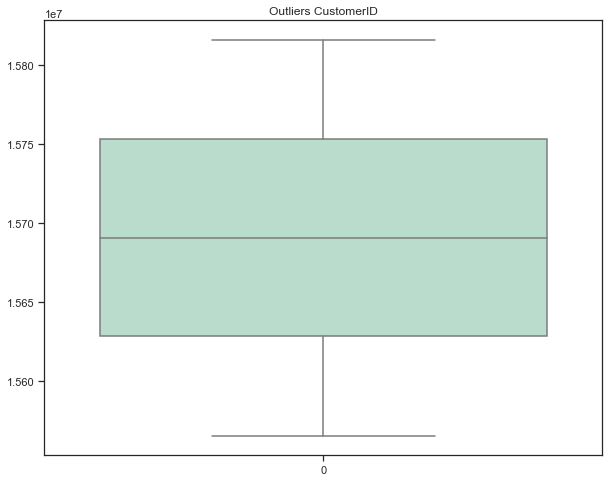

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_custID_outliers, palette = 'Pastel2')
plt.title("Outliers CustomerID")
plt.show()

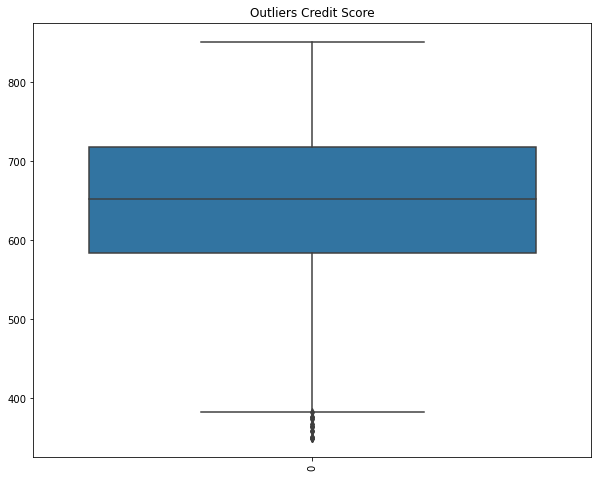

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_CS_outliers)
plt.title("Outliers Credit Score")
plt.show() 

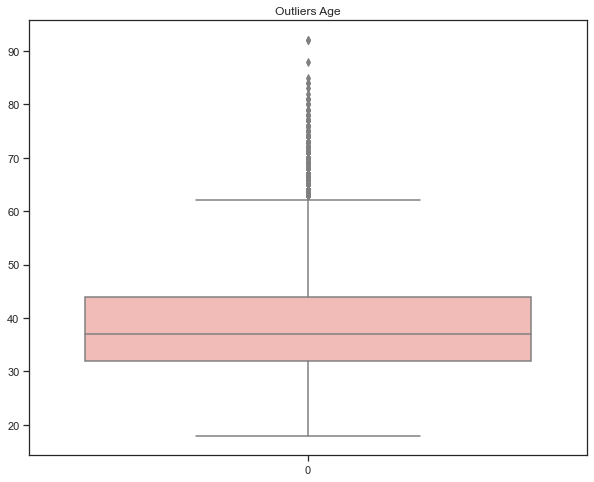

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_age_outliers, palette = 'Pastel1')
plt.title("Outliers Age")
plt.show()

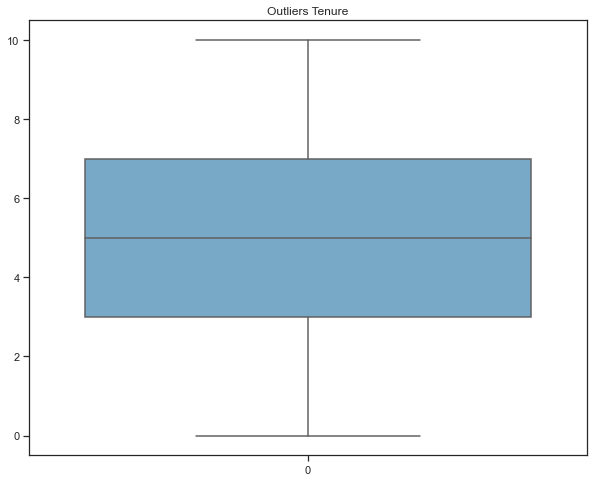

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_tenure_outliers, palette = 'Blues')
plt.title("Outliers Tenure")
plt.show()

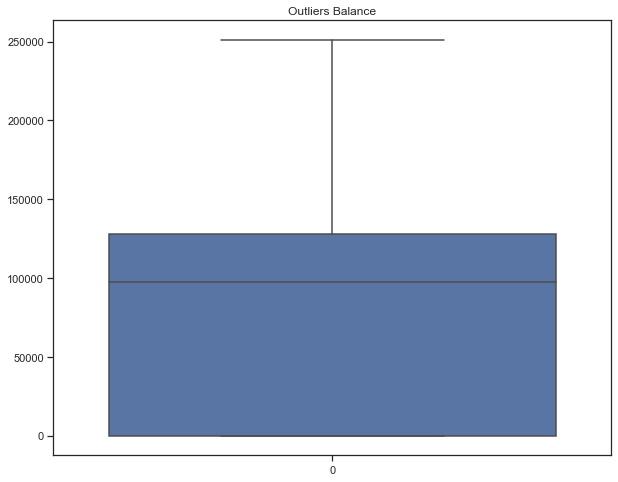

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_balance_outliers)
plt.title("Outliers Balance")
plt.show()

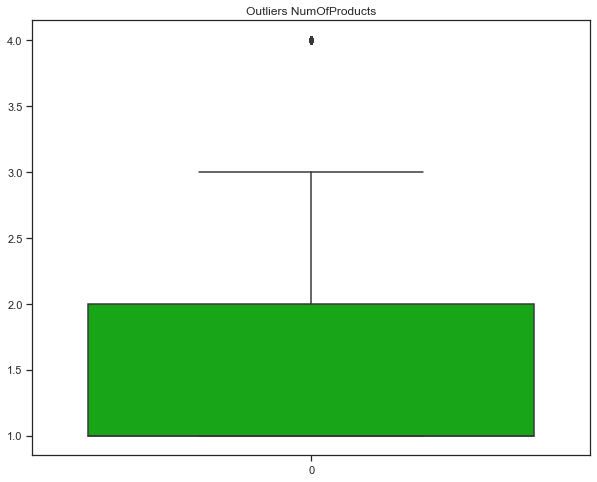

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_NOP_outliers, palette = 'nipy_spectral')
plt.title("Outliers NumOfProducts")
plt.show()

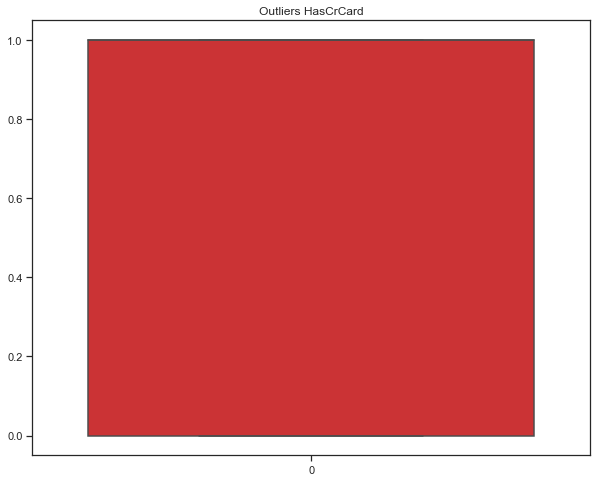

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_CC_outliers, palette = 'Set1')
plt.title("Outliers HasCrCard")
plt.show()

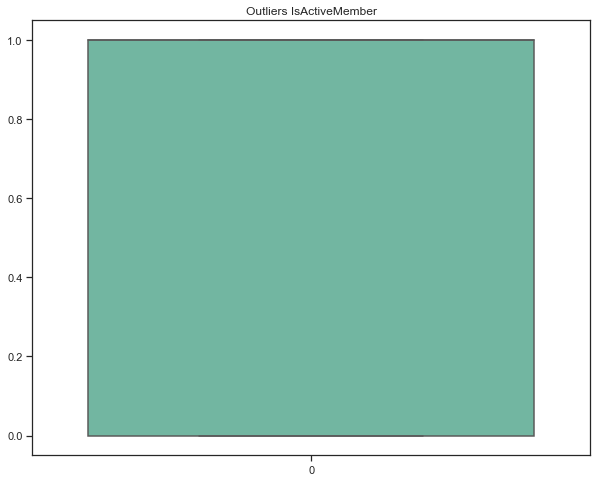

In [68]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_member_outliers, palette = 'Set2')
plt.title("Outliers IsActiveMember")
plt.show()

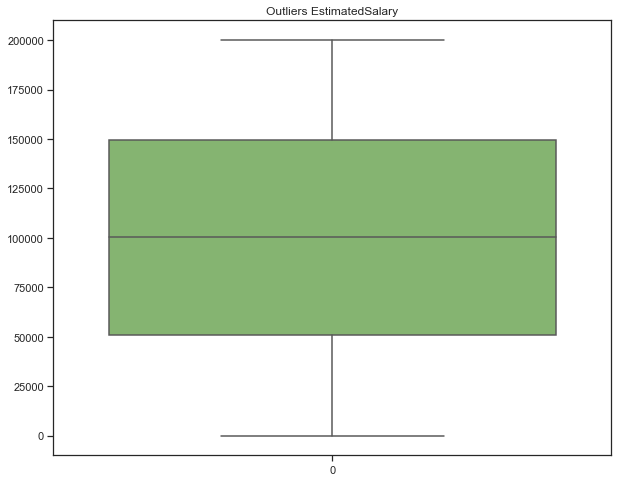

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_salary_outliers, palette = 'summer')
plt.title("Outliers EstimatedSalary")
plt.show()

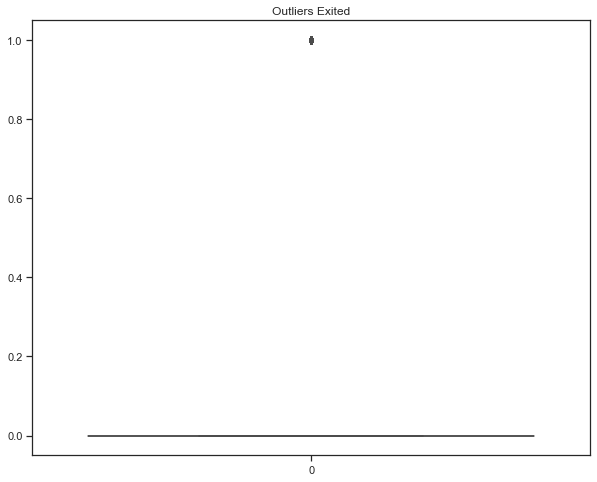

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_exited_outliers)
plt.title("Outliers Exited")
plt.show()

# Pembahasan Outliers
- Bisa di lihat di tabel atas, bahwa yang memiliki outliers adalah: 
    - Age
    - CreditScore
    - NumOfProducts
    - Exited
        - Untuk Exited bisa di bilang data yg di dapat bukanlah outliers di karenakan data di exited adalah menggunakan 0 = pindah, 1 = tidak pindah.
        - Hanya terdapat 2 data di dalam variable Exited. Jadi Outliers di Exited tidak bisa di bilang sebagai Outliers.
        

# Data Analisis
- CustomerID = ID Customer
- Surname = Nama Keluarga / Family Name
- Credit Score = Kredit Score
- Geography = Negara
- Gender = Male / Female
- Age = Umur
- Tenure = Durasi Pinjaman (Bulan)
- Balance = Jumlah Uang yang tersimpan di bank
- NumOfProducts = Jumlah Produk
- HasCrCard = Sudah Mempunyai Credit Card (0 = tidak punya, 1 = punya)
- IsActiveMember = Member yang Aktif
- Estimated Salary = Perkiraan Gaji (Per tahun)
- Exited = Yang keluar / Pindah Bank

# Pembahasan Credit Score

- Credit Score adalah angka antara 300–850 yang menggambarkan kelayakan kredit konsumen. 
- Semakin tinggi skornya, semakin baik peminjam memandang calon pemberi pinjaman.
- Model Credit Score dibuat oleh Fair Isaac Corporation, juga dikenal sebagai FICO, dan digunakan oleh lembaga keuangan.  
- Juga ada model Credit Score lainnya, tetapi FICO adalah yang paling sering di gunakan.

# Tabel Credit Score

- Excellent: 800 to 850
- Very Good: 740 to 799
- Good: 670 to 739
- Fair: 580 to 669
- Poor: 300 to 579



source : https://www.investopedia.com/terms/c/credit_score.asp

In [95]:
# Membikin Pemisah Untuk Melihat Credit Score customer, Termasuk Customer ber Credit Score Apa?
listkosong = []
for i in df['CreditScore']:
    if i >= 800 and i <= 850:
        listkosong.append("Excellent")
    elif i >= 740 and i <= 799:
        listkosong.append("Very Good")
    elif i >= 670 and i <= 739:
        listkosong.append('Good')
    elif i >= 580 and i <= 669:
        listkosong.append('Fair')
    elif i >= 300 and i <= 579:
        listkosong.append("Poor")
    else:
        listkosong.append("Tidak Ada")
df['Rating_Credit_Score'] = listkosong
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Rating_Credit_Score
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


# Drop Variables yang tidak di pakai

In [97]:
df.drop(columns = ['RowNumber','Surname'], inplace = True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Rating_Credit_Score
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


# Univariate

In [102]:
df['Rating_Credit_Score'].value_counts(normalize = True)
# Dari semua Customer hanya 0.2362 atau 23.62 % yang memiliki Poor Credit Score Rating

Fair         0.3331
Good         0.2428
Poor         0.2362
Very Good    0.1224
Excellent    0.0655
Name: Rating_Credit_Score, dtype: float64

In [118]:
df['Geography'].value_counts(normalize = True)
# Customer terbanyak ada di Perancis (50.14%), dan yang paling sedikit di Spanyol (24.77%), dan sisanya berada di Jerman (25.09%)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [109]:
df['Age'].mean()
# Rata2 Customer yang meminjam adalah berumur 39 Tahun

38.9218

In [119]:
df['Gender'].value_counts(normalize = True)
# Jumlah Laki-laki(54.6%) Lebih sering pinjam / melakukan transaksi ke bank daripada Perempuan (45.4%)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [114]:
df['HasCrCard'].value_counts(normalize = True)
# Jumlah customer yang memiliki Kartu Kredit Mencapai 70.5%

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [165]:
df['Exited'].value_counts(normalize = True)
# Bisa di simpulkan Bahwa Jumlah orang yang pindah ke bank lain sebesar 20.37%

0    0.7963
1    0.2037
Name: Exited, dtype: float64

# Multivariate
    
    Notes: Exited, 0 = tetap, 1 = pindah

In [132]:
pd.crosstab(index = df['Geography'], columns = df['Exited'], normalize = 'columns')
# Bisa di lihat di tabel bawah, Negara yang memiliki tingkat loyalitas tertinggi berada di negara Perancis, Sedangkan Jerman adalah negara yang memiliki nilai Pindah Bank terbanyak

Exited,0,1
Geography,,
France,0.527942,0.397644
Germany,0.212859,0.399607
Spain,0.259199,0.202749


In [138]:
pd.crosstab(index = df['Gender'], columns = [df['Geography'], df['Exited']], normalize = 'columns')
# Untuk laki- laki, yang paling besar melakukan perpindahan adalah dari negara Jerman
# Untuk Perempuan, yang paling besar melakukan perpindahan adalah dari negara Perancis

Geography    France             Germany               Spain          
Exited            0         1         0         1         0         1
Gender                                                               
Female     0.428402  0.567901  0.439528  0.550369  0.415698  0.559322
Male       0.571598  0.432099  0.560472  0.449631  0.584302  0.440678

In [133]:
pd.crosstab(index = df['Gender'], columns = df['Exited'], normalize = 'columns')
# Di Ketahui bahwa Perempuan(56%) lebih banyak melakukan perpindahan bank di banding laki - Laki(44%)

Exited,0,1
Gender,,
Female,0.427477,0.559156
Male,0.572523,0.440844


In [137]:
pd.crosstab(index = df['Gender'], columns = df['Exited'], values = df['Age'], aggfunc = 'median')
# Bisa di lihat di bandingkan Umur,  Customer yang berumur yang melakukan perpindahan berada di Umur 45 tahun
# Customer yang berumur 36 tahun tidak melakukan perpindahan
# Bisa di artikan bahwa, Semakin Tua Umur Customer, akan lebih berpeluang untuk pindah Bank.

Exited,0,1
Gender,,
Female,36,45
Male,36,45


In [144]:
pd.crosstab(index = df['Exited'], columns = df['NumOfProducts'], normalize = 'columns')
# Bisa di lihat bahwa ternyata customer yang memiliki 4 produk, semuanya pindah
# Dan customer yang memiliki 2 produk adalah customer yang nilai paling tinggi yang menetap di bank

NumOfProducts,1,2,3,4
Exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


In [141]:
pd.crosstab(index = df['IsActiveMember'], columns = df['Exited'], normalize = 'columns')
# Jumlah Member yang aktif lebih sedikit melakukan perpindahan

Exited,0,1
IsActiveMember,,
0,0.445435,0.639175
1,0.554565,0.360825


In [145]:
pd.crosstab(index = df['Exited'], columns = df['Gender'], values = df['Balance'], aggfunc = 'mean')
# Rata2 Customer yang pindah bank adalah customer yang memiliki Jumlah Uang yang tersimpan di bank

Gender,Female,Male
Exited,,
0,71183.249639,73911.607037
1,89036.639359,93736.483742


In [157]:
pd.crosstab(index = df['Exited'], columns = df['HasCrCard'], normalize = 'columns')
# Di dalam Tabel di bawah, Customer yang punya maupun tidak punya, Rasio Perpindahan bank adalah sama, Tetap lebih banyak yang tidak pindah

HasCrCard,0,1
Exited,,
0,0.791851,0.798157
1,0.208149,0.201843


In [155]:
df.groupby("Rating_Credit_Score")['Exited'].mean()
# Jumlah yang paling besar melakukan perpindahan bank adalah yang memiliki jumlah Rating Credit Score Poor

Rating_Credit_Score
Excellent    0.195420
Fair         0.205644
Good         0.186161
Poor         0.220152
Very Good    0.205882
Name: Exited, dtype: float64

In [172]:
pd.crosstab(index = df['Exited'], columns = df['Tenure'], normalize = 'columns')
# Jumlah rasio, durasi tenor tidak berpengaruh dengan rasio jumlah keluarnya nasabah dari bank

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.769976,0.775845,0.808206,0.7889,0.794742,0.793478,0.797311,0.827821,0.807805,0.783537,0.793878
1,0.230024,0.224155,0.191794,0.2111,0.205258,0.206522,0.202689,0.172179,0.192195,0.216463,0.206122


In [164]:
df.corr()
# Korelasi Variables terhadap satu sama lain

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Visualization

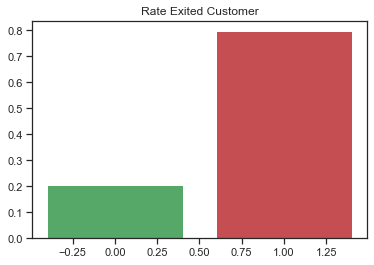

In [177]:
plt.bar(df['Exited'].unique(),df['Exited'].value_counts(normalize = True), color=['r','g'])
plt.title('Rate Exited Customer')
plt.show()

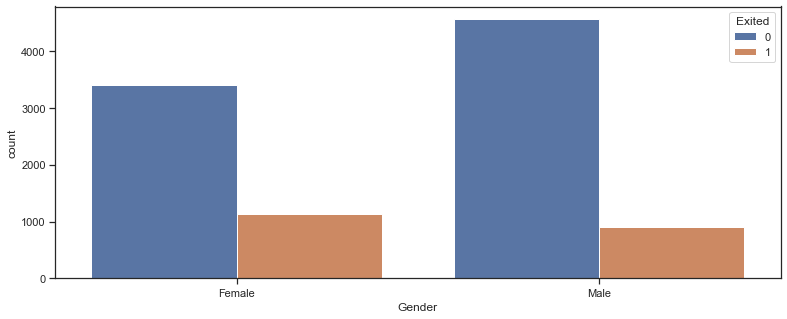

In [186]:
plt.figure(figsize = (13, 5))
sns.countplot('Gender', data = df, hue = 'Exited')
plt.show()
# Ratio Menunjukan Bahwa Wanita Lebih Sering melakukan perpindahan
# Notes: Exited: 0 = tetap, 1 = pindah

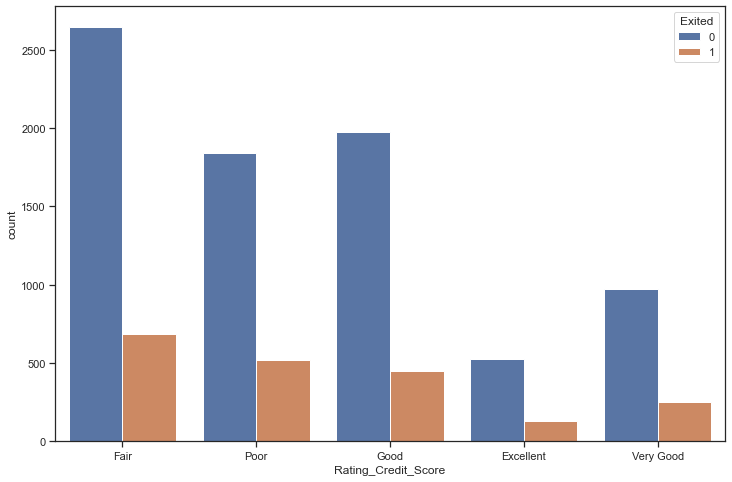

In [185]:
plt.figure(figsize = (12, 8))
sns.countplot('Rating_Credit_Score', data = df, hue = 'Exited')
plt.show()
# jumlah Customer yang melakukan perpindahan berada di customer yang mempunyai Rating Fair dan Poor

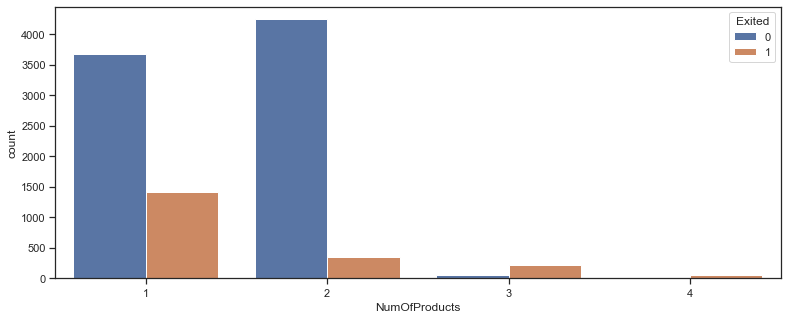

In [184]:
plt.figure(figsize = (13, 5))
sns.countplot('NumOfProducts', hue = 'Exited', data = df)
plt.show()
# Customer yang memiliki 2 produk memiliki rate untuk tetap paling tinggi
# Customer yang memiliki 4 produk memiliki rate untuk tetap paling rendah sebesar 0%

# Insight
- Dari Semua Customer, Customer yang Memiliki Rating Credit Score Poor adalah Customer yang paling banyak pindah.
- 70% dari Customer semua memiliki Kartu Kredit.
- Customer yang Memiliki 4 Produk, loyalitas nya adalah 0 (Semuanya Pindah Bank).
- Customer yang Memiliki 2 Produk, loyalitas nya yang paling tinggi, sebesar 92%.
- Member yang active mempunyai rasio yang lebih besar untuk tidak pindah di banding customer tidak aktif.
- Rata2 Customer yang pindah bank adalah customer yang memiliki Jumlah Uang yang tersimpan di bank.
- Negara yang memiliki jumlah perpindahan paling banyak ada di negara Jerman.
- Wanita memiliki jumlah perpindahan lebih banyak di banding laki laki sebesar 56%.
- Laki - Laki lebih sering meminjam uang di bank.
- Customer yang lebih berumur, lebih banyak pindah (Median 45).
- Customer berumur rata-rata 38 tahun lebih sering meminjam.



# Recommendation
- Dari data yang sudah di olah, dinyatakan bahwa customer yang memiliki lebih dari 2 Produk, lebih perpeluang untuk pindah.
    - Jangan memberi Customer tawaran, jika customer sudah memiliki 2 produk.
- Menambahkan Customer Service, Khusus bagi Customer yang ingin pindah dari Bank.
- Nilai Tenor tidak terlalu berpengaruh bagi Customer yang ingin pindah dari Bank, lebih baik Minimal Nilai Tenor di beri 3 bulan untuk memberi proteksi untuk pihak bank
- Bank harus memberi extra budget, untuk melakukan marketing difokuskan untuk Wanita
    - Contoh: Program Wanita (Bonus Liburan, Diskon Fashion, etc)
- Bank harus mengeluarkan dana lebih untuk meningkatkan Customer Service di bidang Online.
    - Contoh: M-Banking, Mall Customer Service, Lebih banyak memberikan promosi, Dan Lebih bisa memanjakan Customer.
    - Karena dari data di atas, bahwa customer yang non-active adalah customer yang lebih sering melakukan perpindahan.
- Memberikan benefit tambahan untuk nasabah yang loyal terhadap bank, serta bonus nasabah bagi nasabah yang mempunyai tabungan yang bernominal besar.
- Meningkat kan Digital Marketing di Negara Jerman, tidak menutupi untuk menjaga konsistensi pelayanan di negara Perancis dan Spanyol

# Assumption
- Dari Sumber yang di dapat, bahwa mempertahankan hanya 2% berpengaruh untuk laba kurang lebih 10%

source: https://elitemarketer.id/productivity/mempertahankan-customer-dengan-mengurangi-churn-rate-melalui-email/